In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [2]:
class Config:
    TRAINING_FILE = "../input/train_data_2000.csv"
    CONTACT_FILE = "../input/contact_data_2000.csv"
    TEST_FILE = "../input/test_data_2000.csv"
    MODEL_OUTPUT = "../models/"
    PROCESSED_DATA_OUTPUT = "../input/processed_data.csv"


config = Config()

In [3]:
test = pd.read_csv(config.TEST_FILE)
train = pd.read_csv(config.TRAINING_FILE)
contact = pd.read_csv(config.CONTACT_FILE)

In [4]:
contact['intra'] = (contact['chr1'] == contact['chr2']).astype(int)

In [5]:
contact['log_dist'] = np.where(contact['intra'] == 1, (np.log2(np.abs(contact['end2'] - contact['end1']) + 1) + 0.1) / 0.1, 0)

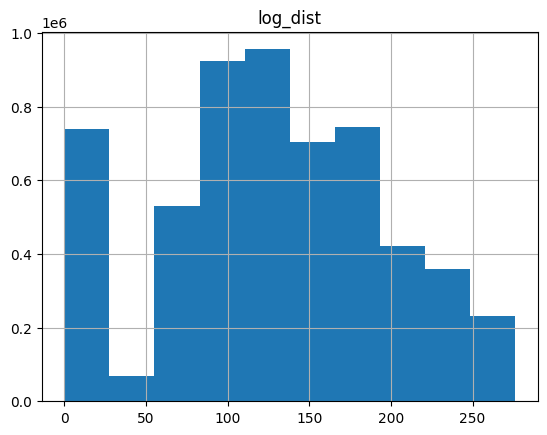

In [6]:
contact.hist(column='log_dist')
plt.show()

In [7]:
n = (contact['log_dist'] > 0).sum()
bins = [-1, 0, 50, 100, 150, 200, 250, 300]
labels = ['0', '0-50', '50-100', '100-150', '150-200', '200-250', '250-300']
contact['log_dist_bin'] = pd.cut(contact['log_dist'], bins = bins, labels = labels)
contact.head()

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1,1,207.004193,200-250
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1,0,0.000000,0
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1,0,0.000000,0
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200


In [8]:
prob_df = contact.groupby(['cellid', 'log_dist_bin']).size().unstack(fill_value=0)
prob_df = prob_df.div(prob_df.sum(axis=1), axis=0)
prob_df

log_dist_bin,0,0-50,50-100,100-150,150-200,200-250,250-300
cellid,,,,,,,
SCG0088_AAAGGACGTTAACGGC-1,0.175143,0.005968,0.158796,0.259211,0.210431,0.125584,0.064868
SCG0088_AAATCCGGTGACATAT-1,0.116243,0.005389,0.224788,0.279061,0.257891,0.074673,0.041955
SCG0088_AACAGCAAGACAGGCG-1,0.115605,0.004902,0.223856,0.348039,0.192402,0.083742,0.031454
SCG0088_AACATCATCAGGTTTA-1,0.091257,0.004867,0.171563,0.356683,0.280028,0.067617,0.027985
SCG0088_AACCTTAAGCTGCACA-1,0.144164,0.009582,0.212979,0.280923,0.216028,0.087108,0.049216
...,...,...,...,...,...,...,...
SCG0093_TTTGACTTCAAGGACA-1,0.149098,0.010446,0.204653,0.280152,0.250712,0.075499,0.029440
SCG0093_TTTGAGTCAATGCGCT-1,0.157895,0.006352,0.250000,0.284936,0.191924,0.069419,0.039474
SCG0093_TTTGCGGAGGATGATG-1,0.159850,0.007052,0.253879,0.280207,0.193230,0.075693,0.030089


In [9]:
train = train.merge(prob_df, on='cellid', how='left')
train

,cellid,phase,order_within_phase,order,0,0-50,50-100,100-150,150-200,200-250,250-300
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,0.106918,0.004324,0.150943,0.342767,0.223664,0.116352,0.055031
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.117595,0.009354,0.251225,0.271715,0.198218,0.106904,0.044989
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.117763,0.005888,0.226202,0.301766,0.236997,0.084396,0.026987
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,0.103506,0.003362,0.175793,0.328050,0.191162,0.125360,0.072767
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.148919,0.011424,0.246430,0.302326,0.197470,0.064055,0.029376
...,...,...,...,...,...,...,...,...,...,...,...
1496,SCG0093_GTCCAGGGTCAGGCAT-1,G2M,11,43,0.137519,0.011958,0.248630,0.271550,0.217738,0.075237,0.037369
1497,SCG0090_GAGCATGCAAACGCGA-1,G2M,11,43,0.126285,0.005874,0.253059,0.288302,0.245228,0.059716,0.021537
1498,SCG0092_GCTAGCCAGTTTCCGC-1,G2M,11,43,0.105968,0.004839,0.181290,0.329355,0.254355,0.097258,0.026935
1499,SCG0092_TAGGGTTTCGCCTAAG-1,G2M,11,43,0.124407,0.008814,0.210169,0.292203,0.254915,0.075932,0.033559


In [ ]:
# Feature below made accuracy worse

In [ ]:
# min_start = min(contact['start1'].min(), contact['start2'].min())
# min_start

3000160

In [ ]:
# max_end = max(contact['end1'].max(), contact['end2'].max())
# max_end

195371706

In [ ]:
# (max_end - min_start) / 500000

384.743092

In [ ]:
# bin_len = 500000 * 8
# bins = list(range(0, max_end + bin_len, bin_len))
# labels = list(range(1, len(bins)))
# contact['bin1'] = pd.cut(contact['start1'], bins = bins, labels = labels)
# contact['bin2'] = pd.cut(contact['start2'], bins = bins, labels = labels)
# contact

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin,bin1,bin2
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1,1,207.004193,200-250,19,19
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1,0,0.000000,0,20,2
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1,0,0.000000,0,19,32
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150,35,35
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
5679069,chr12-P,104620937,104621003,chr12-P,64688195,64688345,SCG0093_GCGATTTAGGCGCTAC-1,1,253.510658,250-300,27,17
5679070,chr12-P,34306015,34306042,chr12-P,34303888,34303918,SCG0093_AATCAGGAGCTCCTAC-1,1,111.532471,100-150,9,9
5679071,chr2-P,123666481,123666505,chr2-P,136717359,136717509,SCG0093_CCTGGTAAGGCGGGTA-1,1,237.376576,200-250,31,35
5679072,chr15-P,38079409,38079445,chr15-P,38079626,38079723,SCG0093_AATCAGGAGCTCCTAC-1,1,82.241213,50-100,10,10


In [ ]:
# contacts_count = contact.groupby(['cellid', 'bin1', 'bin2']).size().reset_index(name='count')
# contacts_count['fraction'] = contacts_count['count'] / contacts_count.groupby('cellid')['count'].transform('sum')
# contacts_count['column_label'] = contacts_count['bin1'].astype(str) + '-' + contacts_count['bin2'].astype(str) + 'cf' # bin i-j contacts fraction
# contacts_count = contacts_count.pivot(index='cellid', columns='column_label', values='fraction').fillna(0).reset_index()
# contacts_count


In [ ]:
# train = train.merge(contacts_count, on='cellid', how='left')
# train

,cellid,phase,order_within_phase,order,0,0-50,50-100,100-150,150-200,200-250,...,9-46cf,9-47cf,9-48cf,9-49cf,9-4cf,9-5cf,9-6cf,9-7cf,9-8cf,9-9cf
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,0.106918,0.004324,0.150943,0.342767,0.223664,0.116352,...,0.0,0.0,0.0,0.0,0.000393,0.000000,0.000000,0.000000,0.000393,0.018082
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.117595,0.009354,0.251225,0.271715,0.198218,0.106904,...,0.0,0.0,0.0,0.0,0.000445,0.000445,0.000000,0.000445,0.000000,0.025390
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.117763,0.005888,0.226202,0.301766,0.236997,0.084396,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.029931
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,0.103506,0.003362,0.175793,0.328050,0.191162,0.125360,...,0.0,0.0,0.0,0.0,0.000240,0.000000,0.000240,0.000240,0.000961,0.021374
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.148919,0.011424,0.246430,0.302326,0.197470,0.064055,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000816,0.000408,0.000000,0.028152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,SCG0093_GTCCAGGGTCAGGCAT-1,G2M,11,43,0.137519,0.011958,0.248630,0.271550,0.217738,0.075237,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000498,0.000498,0.025909
1497,SCG0090_GAGCATGCAAACGCGA-1,G2M,11,43,0.126285,0.005874,0.253059,0.288302,0.245228,0.059716,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.029858
1498,SCG0092_GCTAGCCAGTTTCCGC-1,G2M,11,43,0.105968,0.004839,0.181290,0.329355,0.254355,0.097258,...,0.0,0.0,0.0,0.0,0.000161,0.000968,0.000161,0.000484,0.001129,0.026129
1499,SCG0092_TAGGGTTTCGCCTAAG-1,G2M,11,43,0.124407,0.008814,0.210169,0.292203,0.254915,0.075932,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000678,0.000339,0.032203


In [17]:
# Save after processing
train.to_csv(config.PROCESSED_DATA_OUTPUT, index=False)